# Cardiovascular Disease - EDA, Descriptive Analysis, and Machine Learning

### ----------------------------------------------------------------------------------------------------------
### ----------------------------------------------------------------------------------------------------------

In [1]:
#######################
#       imports       #
#######################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
sns.set(color_codes=True)

### ----------------------------------------------------------------------------------------------------------

## 1.Load Dataset and inspecting Dataframe

In [2]:
# Reading the Dataset >>> Add your path of the file
df = pd.read_csv('cardio_train.csv', sep = ';')

In [3]:
#df = pd.read_csv('../input/cardiovascular-disease-dataset/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### ----------------------------------------------------------------------------------------------------------

#### Overview

This dataset contains 13 columns. (the first column is id)

Age column represents the number of days a person has been alive.

In gender column, 1 means a person is women, 2 means men

Height and weight are objective features. 

The ap_hi column represents the Systolic Blood Pressure which is when the heart is contracting, 

However, ap_lo is the Diastolic Blood Pressure which is when the heart muscle relaxes.

Cholesterol column has three levels: 1 is normal levels, 2 is above normal, and 3 is well above normal.

 Glucose follows the same scale: 1 is normal levels, 2 is above normal, and 3 is well above normal.

 Smoking and alcohol columns indicate whether a person smokes and drinks or not, respectively.

The target variable (cardio) represents if a person has cardiovascular disease, 1 if they have (cardio) and 0 if not.

### ----------------------------------------------------------------------------------------------------------

##  2.Preparation and Feature Generation

Now, lets prepare our columns to make them much easier to read and generate some features to use them in the descriptive analysis:

First, we drop id column, since it does not provide any additional information.

In [6]:
# dropping id column
df.drop(columns=['id'], inplace=True)

We then convert the values of age column into years, which makes more sense to interpret. In wich we divide the number of days a person has lived by 365.25 and round them. we also add the age_groups column, define five years on each group. The lase age group contains both boundries, whereas all other age groups contain only the lower boundry.

In [7]:
# changing the age column into year we will divide the age by 365.25 and round them
df['age'] = df['age'].map(lambda x: round(x/365.25))

In [8]:
# defining a function for age_groups
def age_groups (age): 
        if (age >=30 and age <35):
            return 'from_30_to_34'
        elif (age>=35 and age <40):
            return 'from_35_to_39'
        elif (age>=40 and age<45):
            return 'from_40_to_44'
        elif (age>=45 and age<50):
            return 'from_45_to_49'
        elif (age>=50 and age<55):
            return 'from_50_to_54'
        elif (age>=55 and age<60):
            return 'from_55_to_59'
        else:
            return 'from_60_to_65'

In [9]:
#creating a new column for age_groups  
df.insert(1, 'age_groups', (df.age.apply(age_groups)))
df['age_groups'].value_counts()

from_50_to_54    19319
from_55_to_59    16077
from_60_to_65    15741
from_40_to_44     9593
from_45_to_49     8796
from_35_to_39      470
from_30_to_34        4
Name: age_groups, dtype: int64

Also we add a new column "gender_val" for gender with the labels zero and ones which represent women and men respectively. At the same time we keep our original column where we set the labels women and men explicitly for later analysis.

In [10]:
# defining a function for gender_val
def gender_val (gender): 
        if (gender == 1):
            return 0
        elif (gender == 2):
            return 1
        else:
            return None

In [11]:
# Generating gender_val column values to (0 for women & 1 for men)
df.insert(2, 'gender_val', df.gender.apply(gender_val))
df['gender_val'].value_counts()

0    45530
1    24470
Name: gender_val, dtype: int64

In [12]:
# changing the gender column values to (0 for women & 1 for men)
df['gender'].replace({1:'women' , 2: 'men'}, inplace= True)


Additionally we add a new column "bp_tot" for blood pressure performing the division of ap_hi on ap_lo columns values, also we add blood pressure group for later analysis.

In [ ]:
# Generating blood pressure'bp_tot' column
#df.insert(8, 'bp_tot', round(((df['ap_hi'])/(df['ap_lo'])), 2))

In [13]:
# defining a function that scans two columns of each row which are the ap_hi and ap_lo 
# then based on the values of these columns it categorizes the patients blood pressure 
# as Normal, Elevated, High Blood Pressure Stage 1, High Blood Pressure Stage 2 or Hypertensive Crisis.
#(https://www.heart.org/-/media/files/health-topics/high-blood-pressure/hbp-rainbow-chart-english.pdf)

def bp_categ(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high stage 1'
    elif x<=180 or y<=120:
        return "high stage 2"
    elif x>180 or y>120:
        return 'Crisis'
    else:
        return None

In [14]:
#creating a new column for bp_categ  
df.insert(8, "bp_categ", df.apply(lambda row: bp_categ(row['ap_hi'], row['ap_lo']), axis=1))
df['bp_categ'].value_counts()

normal          39057
high stage 1    15392
high stage 2    15053
elevated          421
Crisis             77
Name: bp_categ, dtype: int64

Finally, we add "bmi" column which represent the Body Mass Index performing the division of weight on  the height for each person, and then we define and add 6 groups for obesity.

In [15]:
# creating a new column for BMI: weight in (kg) divided by height in meters, squared (m2).
df.insert(6, 'bmi', round((df['weight']/(df['height']/100)**2), 2))

In [16]:
# defining a function that group the BMI numbers into weight classes that was developed by NIH.
# based on the values of BMI the 6 obesety categories are: Below 18.5: (Underweight); 18.5 - 24.9: (Normal weight);
# 25.0 - 29.9: (Pre-obesity); 30 - 34.9: (Obesity Class 1); 35 - 39.9: (Obesity Class 2);
# 40 and above: (Obesity Class 1). 
# source:(https://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi)


def bmi_groups(bmi):
    if   bmi <18.5:
        return "Underweight"
    elif bmi >= 18.5 and bmi < 25 :
        return "Normal weight"
    elif bmi >= 25 and bmi < 30:
        return "Pre-obesity"
    elif bmi >= 30 and bmi < 35:
        return "Obesity Class 1 (Moderately obese)"
    elif bmi >= 35 and bmi < 40:
        return "Obesity Class 2 (Severely obese)"
    elif bmi >= 40:
        return "Obesity Class 3 (Very severely obese)"


In [17]:
#creating a new column for bp_categ  
df.insert(6, "weight_classes", df.apply(lambda row: bmi_groups(row['bmi']), axis=1))
df['weight_classes'].value_counts()

Normal weight                            25656
Pre-obesity                              25175
Obesity Class 1 (Moderately obese)       12242
Obesity Class 2 (Severely obese)          4397
Obesity Class 3 (Very severely obese)     1886
Underweight                                644
Name: weight_classes, dtype: int64

### ----------------------------------------------------------------------------------------------------------

##  3.Impossible values and Data Cleaning

> Here we start by checking duplication in the rows in the dataset

In [18]:
#checking for duplicates 
df.duplicated() #.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

We conclude all rows are unique and no duplication occurred.

Now we check the descriptive statistics to find some insight about our min and max statistics for each columns.

In [19]:
# Statistic Overview after correcting for the Age column horizontally
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.303157,6.760171,30.00,48.00,54.000,58.00,65.00
gender_val,70000.0,0.349571,0.476838,0.00,0.00,0.000,1.00,1.00
height,70000.0,164.359229,8.210126,55.00,159.00,165.000,170.00,250.00
weight,70000.0,74.205690,14.395757,10.00,65.00,72.000,82.00,200.00
bmi,70000.0,27.556545,6.091405,3.47,23.88,26.375,30.22,298.67
ap_hi,70000.0,128.817286,154.011419,-150.00,120.00,120.000,140.00,16020.00
ap_lo,70000.0,96.630414,188.472530,-70.00,80.00,80.000,90.00,11000.00
cholesterol,70000.0,1.366871,0.680250,1.00,1.00,1.000,2.00,3.00
gluc,70000.0,1.226457,0.572270,1.00,1.00,1.000,1.00,3.00
smoke,70000.0,0.088129,0.283484,0.00,0.00,0.000,0.00,1.00


Main findings from the statistics description above:

For the rows, we can conclude from the number of count values in each column that no missing data in our dataset, and the rows are 70000 total.

Impossible values can occur in the data due to typos such as systolic (ap_hi) and diastolic (ap_lo) blood pressure with negative values which is an obvious typo. Also Diastolic Blood Pressure has for example zero values which explains the infinity mean and max statistics in the descriptive statistics analysis, Although the total value of the division of systolic acid blood pressure and Diastolic Blood Pressure doesn't make sense in the medical field has been done here for exploring purposes. So we explore those number closely by creating masks later and decide our cut off points!

Miniumum age recorded is 30 years old and maximum age recorded is 65

Height(cm) and weight(kg),
height - min: 55cm and max: 250cm, weight - min: 10kg and max: 200kg


The columns ap_hi and ap_lo represent examination features and both recorded extremes values,
ap_hi - min:-150 and max:16020, ap_low - min:-70 and max:11000

We definitely need to dig-deep to inspect the unusual values in the data, we visualize our findings via plots:

### ----------------------------------------------------------------------------------------------------------

#### We plot the corrolation using pairplot.

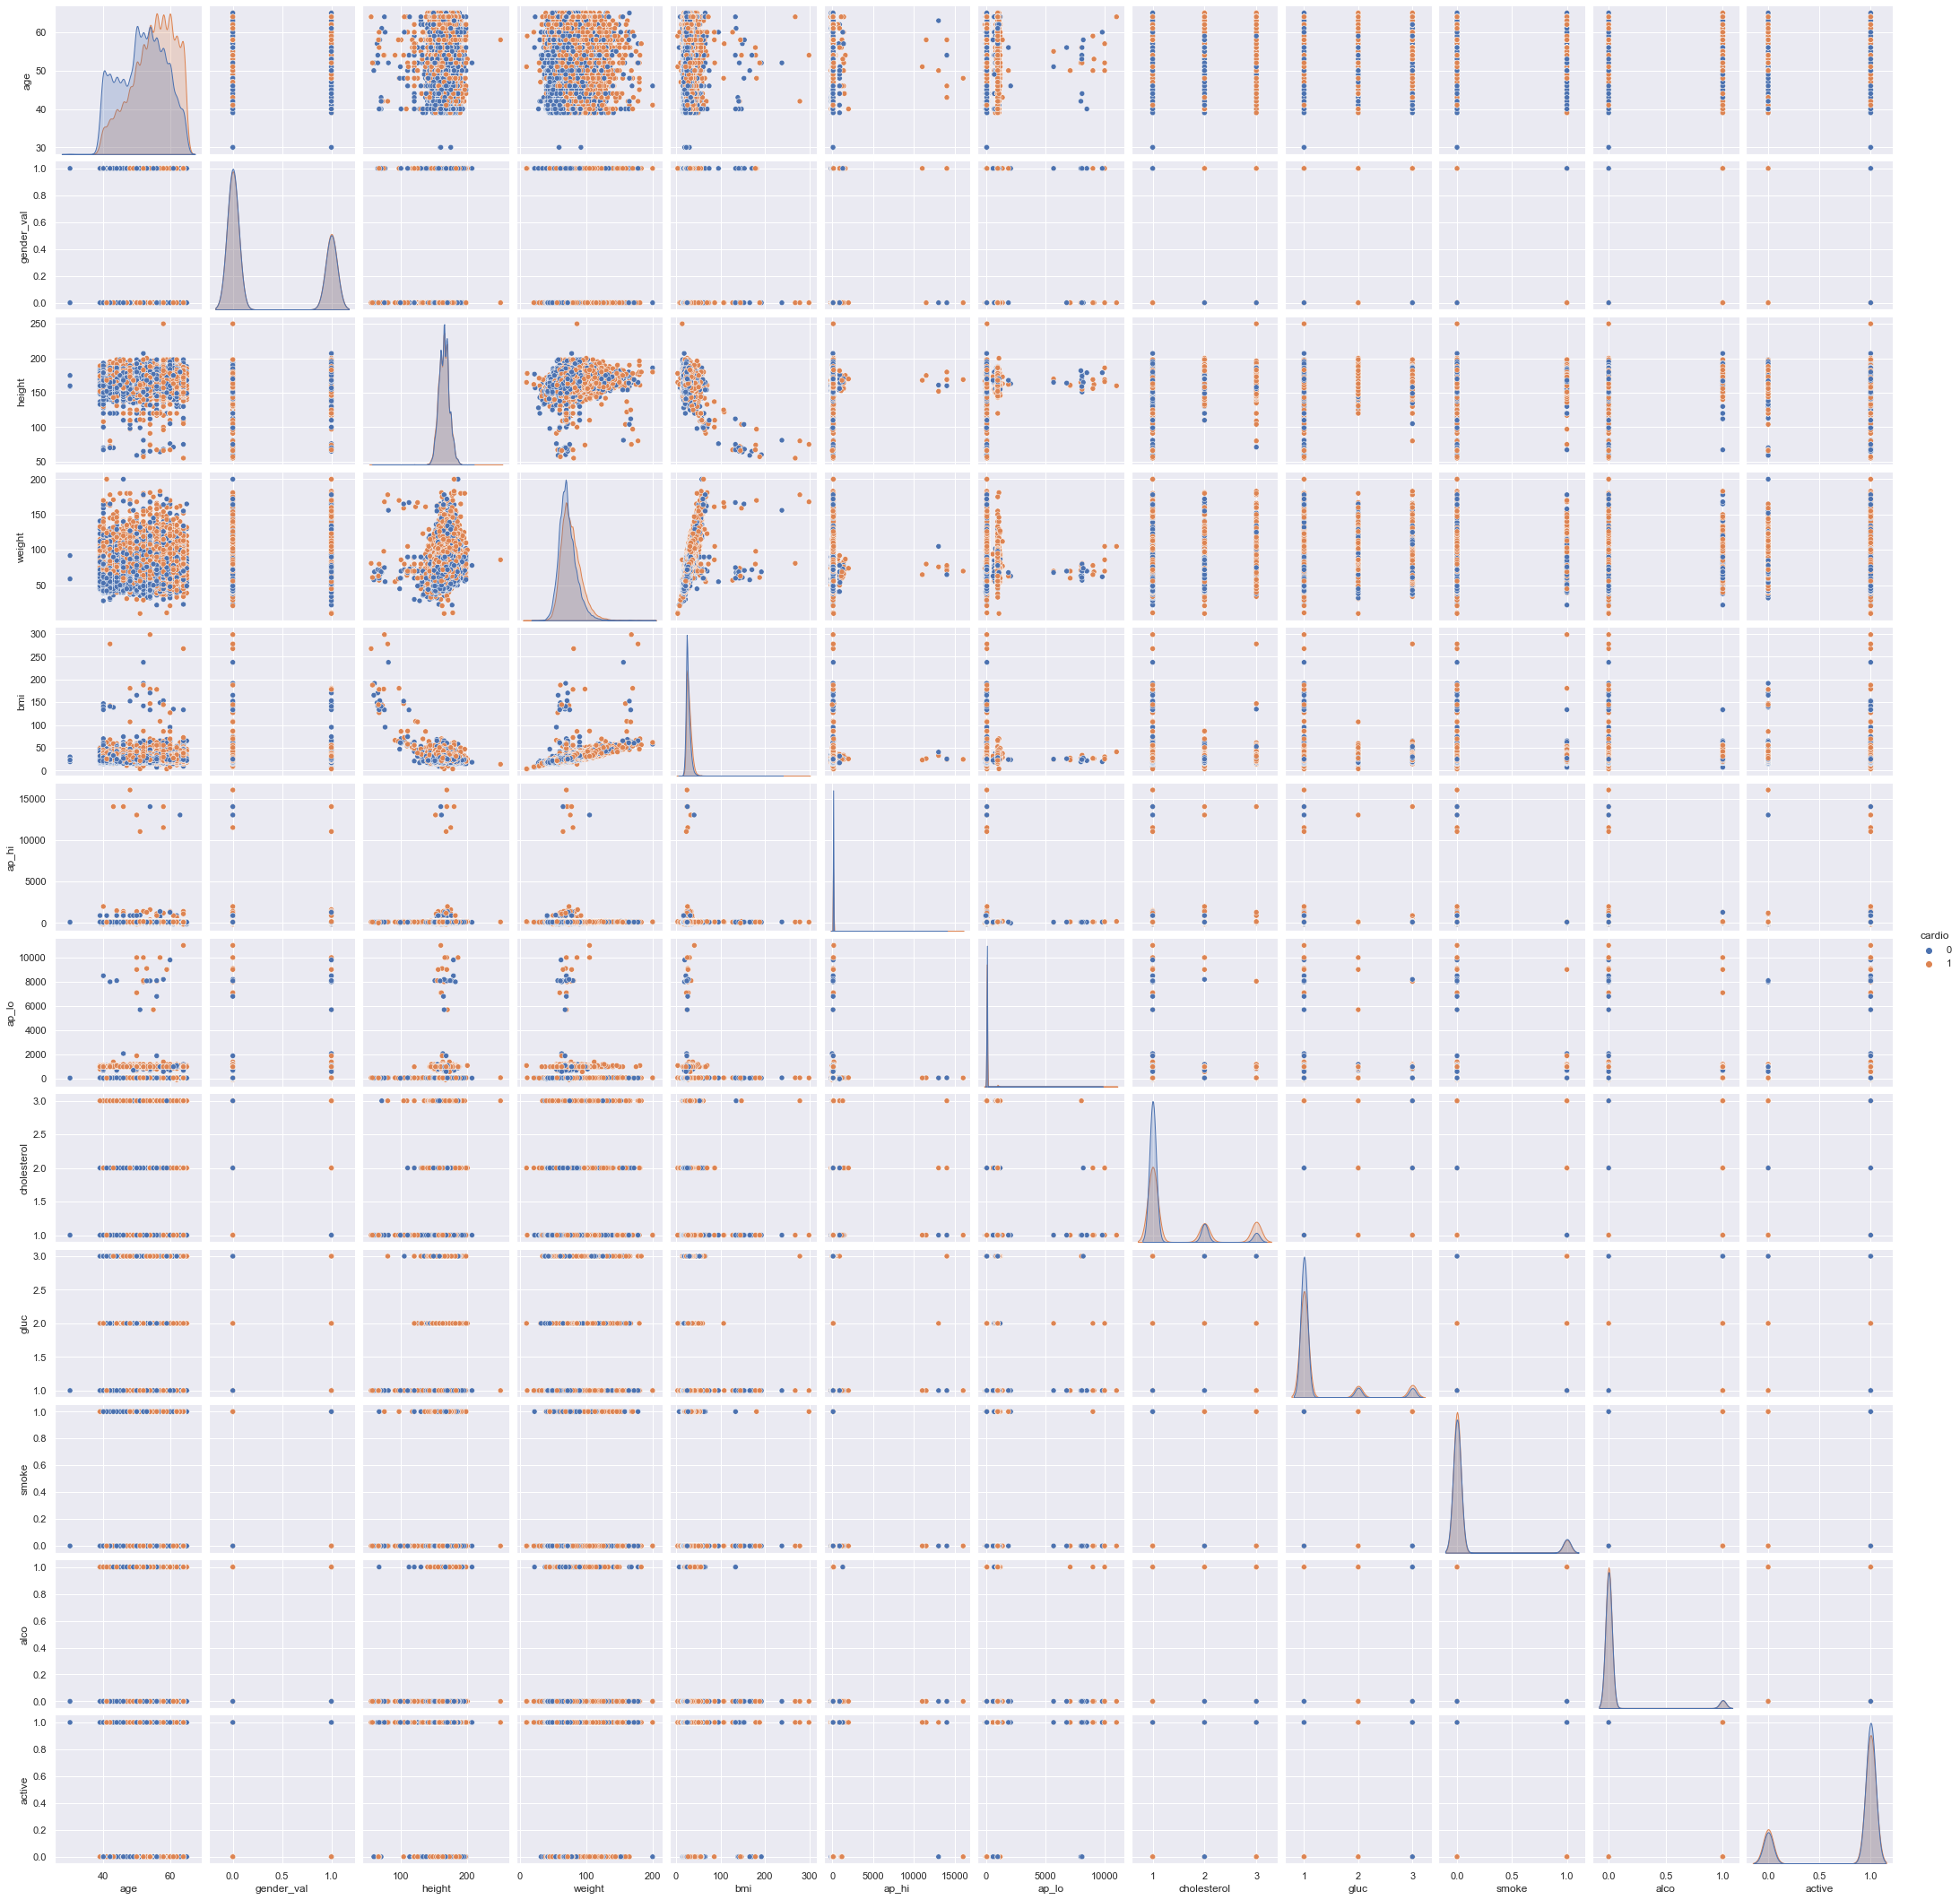

In [20]:
sns.pairplot(df, hue= 'cardio')

### ----------------------------------------------------------------------------------------------------------

#### Box Plot (weight vs cardio) & (height vs cardio)

Text(0.5, 66.5, '')

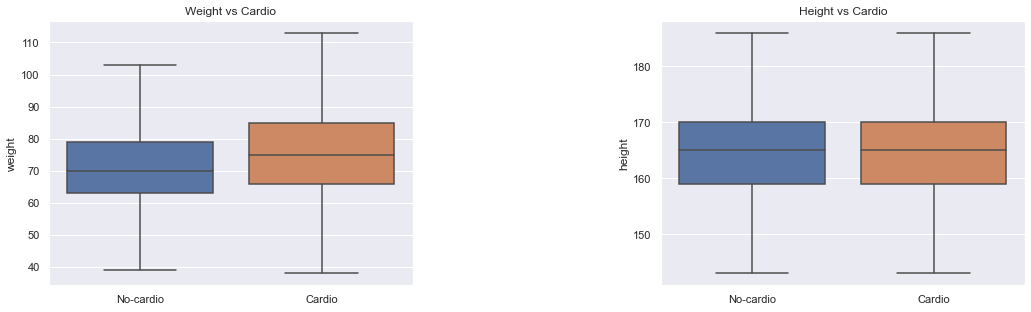

In [21]:
#Box Plot (weight vs cardio) & (height vs cardio)
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sns.boxplot(data= df, x='cardio', y='weight',showfliers=False, ax=ax[0])
sns.boxplot(data= df, x='cardio', y='height', showfliers=False, ax=ax[1])
ax[0].title.set_text('Weight vs Cardio')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('Height vs Cardio')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")


### ----------------------------------------------------------------------------------------------------------

#### Box Plot (ap_hi vs cardio) & (ap_lo vs cardio)

Text(0.5, 66.5, '')

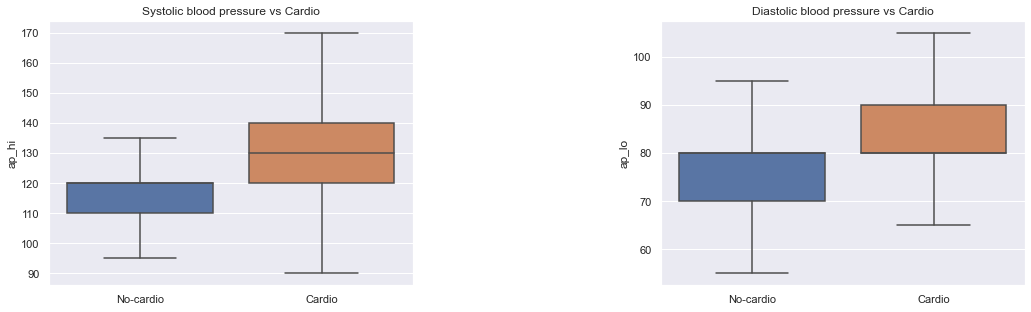

In [22]:
#Box Plot (ap_hi vs cardio) & (ap_lo vs cardio)
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sns.boxplot(data= df, x='cardio', y='ap_hi',showfliers=False, ax=ax[0])
sns.boxplot(data= df, x='cardio', y='ap_lo', showfliers=False, ax=ax[1])
ax[0].title.set_text('Systolic blood pressure vs Cardio')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('Diastolic blood pressure vs Cardio')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")


### ----------------------------------------------------------------------------------------------------------

#### Box Plot (age vs cardio) & (bmi vs cardio)

Text(0.5, 66.5, '')

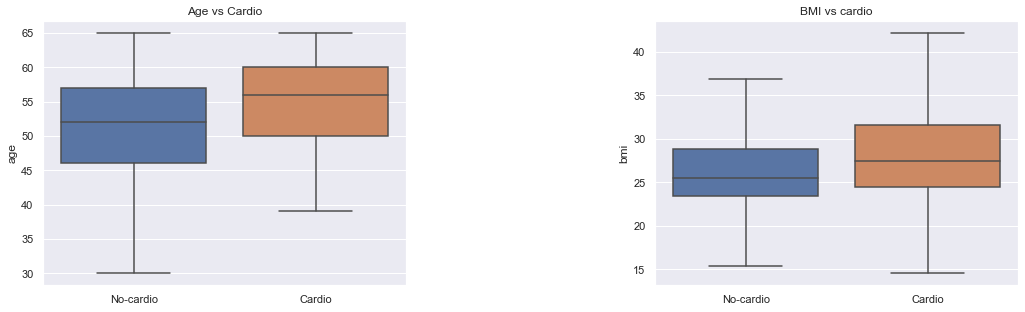

In [23]:
#Box Plot (age vs cardio) & (bmi vs cardio)
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sns.boxplot(data= df, x='cardio', y='age',showfliers=False, ax=ax[0])
sns.boxplot(data= df, x='cardio', y='bmi', showfliers=False, ax=ax[1])
ax[0].title.set_text('Age vs Cardio')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('BMI vs cardio')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")


### ----------------------------------------------------------------------------------------------------------

#### Creating masks to check suspected values

In [24]:
# inspecting the zero values in the denominator of bmi ap_lo
mask0 = (df.ap_lo == 0)
df[mask0].count()

age               21
age_groups        21
gender_val        21
gender            21
height            21
weight            21
weight_classes    21
bmi               21
ap_hi             21
ap_lo             21
bp_categ          21
cholesterol       21
gluc              21
smoke             21
alco              21
active            21
cardio            21
dtype: int64

In [25]:
# diving for more information about (min, max) values of weight
mask1 = (df.weight < 30) | (df.weight > 200) 
df[mask1]#.count() # we find 7 data point

,age,age_groups,gender_val,gender,height,weight,weight_classes,bmi,ap_hi,ap_lo,bp_categ,cholesterol,gluc,smoke,alco,active,cardio
26806,64,from_60_to_65,0,women,157,23.0,Underweight,9.33,110,80,normal,1,1,0,0,1,0
29488,56,from_55_to_59,1,men,177,22.0,Underweight,7.02,120,80,normal,1,1,1,1,1,0
33817,59,from_55_to_59,1,men,178,11.0,Underweight,3.47,130,90,high stage 1,1,1,0,0,1,1
34276,40,from_40_to_44,1,men,128,28.0,Underweight,17.09,120,80,normal,1,1,0,0,1,0
57858,51,from_50_to_54,1,men,165,10.0,Underweight,3.67,180,1100,high stage 2,2,2,0,0,1,1
60188,60,from_60_to_65,0,women,162,21.0,Underweight,8.00,120,80,normal,2,1,0,0,1,1
60699,52,from_50_to_54,0,women,171,29.0,Underweight,9.92,110,70,normal,2,1,0,0,1,1


In [26]:
# diving for more information about (min, max) values of height
mask2 = (df.height < 100) | (df.height > 200)
df[mask2].count() # we find 31 data point

age               31
age_groups        31
gender_val        31
gender            31
height            31
weight            31
weight_classes    31
bmi               31
ap_hi             31
ap_lo             31
bp_categ          31
cholesterol       31
gluc              31
smoke             31
alco              31
active            31
cardio            31
dtype: int64

In [27]:
# diving for more information about (min, max) values of ap_hi reference (min= 50, max= 210)
mask3 = (df.ap_hi < 50) | (df.ap_hi > 210)
df[mask3].count() # we find 31 data point

age               262
age_groups        262
gender_val        262
gender            262
height            262
weight            262
weight_classes    262
bmi               262
ap_hi             262
ap_lo             262
bp_categ          262
cholesterol       262
gluc              262
smoke             262
alco              262
active            262
cardio            262
dtype: int64

In [28]:
# diving for more information about (min, max) values of ap_hi reference (min= 50, max= 210)
mask12 = ((df.bmi < 15) | (df.bmi > 60)) 
df[mask12].count() # we find 93 data point , 26 of them are men

age               93
age_groups        93
gender_val        93
gender            93
height            93
weight            93
weight_classes    93
bmi               93
ap_hi             93
ap_lo             93
bp_categ          93
cholesterol       93
gluc              93
smoke             93
alco              93
active            93
cardio            93
dtype: int64

As expected, here, we see shifted median and long tails in the box plots especially in the plot of systolic blood pressure, diastolic blood pressure and Weight by Cardio. In weight column, for example, we have less than 20 kg!

In the next step we drop outliers and Impossible values I think this step is beneficial before starting the phase of analysis.
Here, we decide the Min, Max cut off points for wight above 30 and less than 200;
the Min, Max cut off points for height above 100 and less than 200;
the Min, Max cut off points for systolic blood pressure above 40 and less than 220;
the Min, Max cut off points for diastolic blood pressure above 40 and less than 180;
the Min, Max cut off points for bmi above 15 and less than 60.
We will end up with 68675 data record


#### Dropping Outliers and Impossible data points

In [31]:
#Dropping Outliers and Impossible data points
df.drop(df.query('bmi >60 or bmi <15').index, axis=0, inplace=True)
df.drop(df.query('ap_hi > 220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)
df.drop(df.query('height < 100 or height > 200').index, axis=0, inplace=True)
df.drop(df.query('weight < 30 or weight > 200').index, axis=0, inplace=True)

In [32]:
df.shape

(68675, 17)

We believe now we are ready for some analysis.

### ----------------------------------------------------------------------------------------------------------

## 4.Descriptive Analysis

<ipython-input-33-877c348ac45c>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up_tri = np.zeros_like(corr, dtype=np.bool)


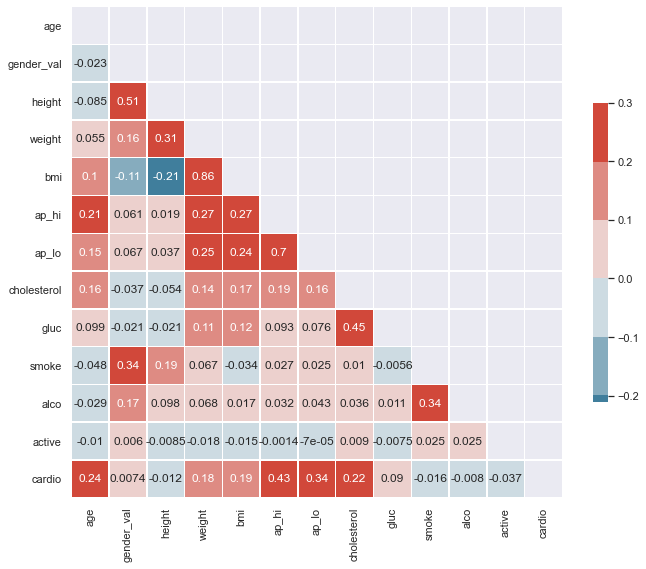

In [33]:
# View the correlations
#df.corr()
corr = df.corr()
cmp = sns.diverging_palette(230, 15)
# Generate a mask for the upper triangle
up_tri = np.zeros_like(corr, dtype=np.bool)
up_tri[np.triu_indices_from(up_tri)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=up_tri, cmap=cmp, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

We detect some correlation between variables and the target "cardio", we also see a multicollinearity situation where the features are correlated with each other, such that, numbers close to 1 or -1 mean the feature positively or negatively correlated with the target "cardio" or another feature. However for the sake of answering some questions of Descriptive Analysis for this dataset, we will study the features one by one and plot Pie Chart and Histograms and comment on them.


### ----------------------------------------------------------------------------------------------------------

Now, Lets answer some questions:

>How many person in this dataset have Cardiovascular disease? (Checking if the targets are balanced)

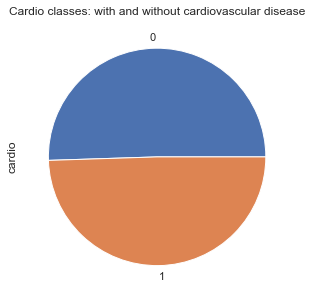

0    34689
1    33986
Name: cardio, dtype: int64 (Hence, the two cardio classes have almost the same counts values.)
The class having a cardiovascular dis as a proportion of the sample : 0.4948816891153986


In [34]:
#How many people in this dataset have Cardiovascular disease?
df['cardio'].value_counts().plot.pie(figsize=(5, 5))
plt.title("Cardio classes: with and without cardiovascular disease")
plt.show()
colors = ['#ff9999','#66b3ff']
print((df['cardio'].value_counts()) , 
      '(Hence, the two cardio classes have almost the same counts values.)')
print('The class having a cardiovascular dis as a proportion of the sample :',
      ((df.cardio == 1).mean()))

This mean we have a balanced dataset 

### ----------------------------------------------------------------------------------------------------------

>Does smoking increase the risk of Cardiovascular disease?

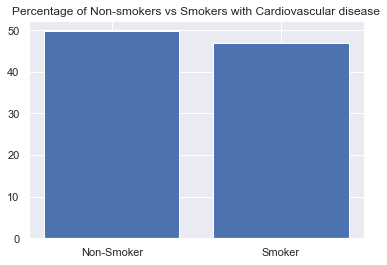

smoke
0    0.497405
1    0.468740
Name: cardio, dtype: float64


In [35]:
smoker_group = df.groupby(['smoke'], as_index=False)
count = smoker_group.count()['cardio']
num_smokers = smoker_group.sum()['cardio']
percentage_smokers_with_cvd = num_smokers / count * 100
plt.bar(x=[0,1], height=percentage_smokers_with_cvd, align='center', tick_label=["Non-Smoker", "Smoker"])
plt.title("Percentage of Non-smokers vs Smokers with Cardiovascular disease")
plt.show()
print(df.groupby('smoke')['cardio'].mean())

>It seems the opposite is true, since our common knowledge dictates us that smoking increases the risk of cardiovascular disease. This could be a result of bias in the process of gathering the data.

### ----------------------------------------------------------------------------------------------------------

>Does cholesterol correlate with Cardiovascular disease?

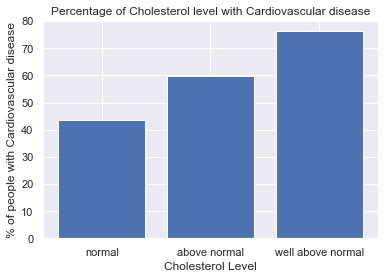

cholesterol
1    0.435625
2    0.596191
3    0.762757
Name: cardio, dtype: float64


In [36]:
cholesterol_group = df.groupby(['cholesterol'], as_index=False)
cholesterol_count = cholesterol_group.count()['cardio']
cholesterol_sum = cholesterol_group.sum()['cardio']
cholesterol_percentage = cholesterol_sum / cholesterol_count * 100

cholesterol_percentage

plt.bar(x=[0,1,2], height=cholesterol_percentage, align='center', tick_label=["normal", "above normal", "well above normal"])
plt.title("Percentage of Cholesterol level with Cardiovascular disease")
plt.ylabel("% of people with Cardiovascular disease")
plt.xlabel("Cholesterol Level")
plt.show()
print(df.groupby('cholesterol')['cardio'].mean())

We can see that if someone has higher level of cholesterol, they are more likely to have Cardiovascular disease.

### ----------------------------------------------------------------------------------------------------------

>Does a particular gender have a higher risk of Cardiovascular disease?

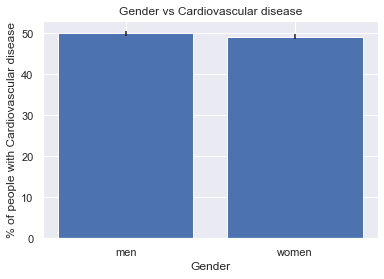

percentages of men and women with cardio out of the total in each gender groups: gender
men      0.499937
women    0.492174
Name: cardio, dtype: float64


In [37]:
gender_group = df.groupby(['gender'], as_index=False)
gender_count = gender_group.count()['cardio']
gender_sum = gender_group.sum()['cardio']
gender_percentage = gender_sum / gender_count * 100

# 0 = 1 (women)
# 1 = 2 (men)
plt.bar(x=['men','women'], height=gender_percentage, yerr=gender_percentage.std(), align='center', tick_label=["men", "women"])
plt.title("Gender vs Cardiovascular disease")
plt.ylabel("% of people with Cardiovascular disease")
plt.xlabel("Gender")
plt.show()

print('percentages of men and women with cardio out of the total in each gender groups:', (df.groupby('gender')['cardio'].mean()))

It looks like men are slightly more likely to have Cardiovascular disease than women which is in align with current clinical evidence. However difference is not statistically different (not significant).

### ----------------------------------------------------------------------------------------------------------

>What is the effect of alcohol on Cardiovascular disease?

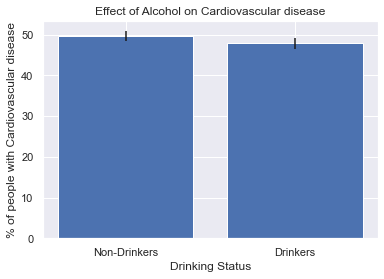

In [38]:
alcohol_group = df.groupby(['alco'], as_index=False)
alcohol_count = alcohol_group.count()['cardio']
alcohol_sum = alcohol_group.sum()['cardio']
alcohol_percentage = alcohol_sum / alcohol_count * 100

plt.bar(x=[0,1], height=alcohol_percentage, yerr=alcohol_percentage.std(), align='center', tick_label=["Non-Drinkers", "Drinkers"])
plt.title("Effect of Alcohol on Cardiovascular disease")
plt.ylabel("% of people with Cardiovascular disease")
plt.xlabel("Drinking Status")
plt.show()

Looks like alcohol has almost no impact on Cardiovascular disease. 

### ----------------------------------------------------------------------------------------------------------

>What is the effect of glucose levels on Cardiovascular disease?

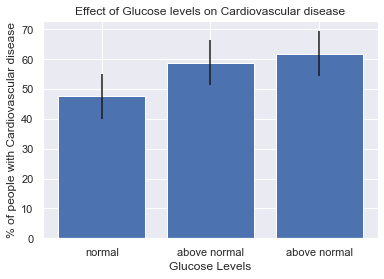

gluc
1    0.475694
2    0.588433
3    0.618474
Name: cardio, dtype: float64


In [39]:
glucose_group = df.groupby(['gluc'], as_index=False)
glucose_count = glucose_group.count()['cardio']
glucose_sum = glucose_group.sum()['cardio']
glucose_percentage = glucose_sum / glucose_count * 100

plt.bar(x=[0,1,2], height=glucose_percentage, yerr=glucose_percentage.std(), align='center', tick_label=["normal", "above normal", "above normal"])
plt.title("Effect of Glucose levels on Cardiovascular disease")
plt.ylabel("% of people with Cardiovascular disease")
plt.xlabel("Glucose Levels")
plt.show()
print(df.groupby('gluc')['cardio'].mean())

This is expected as higher glucose levels can mean a person possibly diagnosed with diabetes. So there is a positive corrolation with the amount of glucose in your boody and Cardiovascular disease rate.

### ----------------------------------------------------------------------------------------------------------

>Does Physical activity have an effect against Cardiovascular disease?

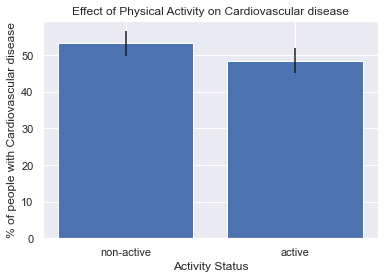

active
0    0.532721
1    0.485616
Name: cardio, dtype: float64


In [40]:
physical_group = df.groupby(['active'], as_index=False)
physical_count = physical_group.count()['cardio']
physical_sum = physical_group.sum()['cardio']
physical_percentage = physical_sum / physical_count * 100

plt.bar(x=[0,1], height=physical_percentage, yerr=physical_percentage.std(), align='center', tick_label=["non-active", "active"])
plt.title("Effect of Physical Activity on Cardiovascular disease")
plt.ylabel("% of people with Cardiovascular disease")
plt.xlabel("Activity Status")
plt.show()

print(df.groupby('active')['cardio'].mean())

We see here that active people have lower Cardiovascular disease rates which is not surpising! However it seems that the effect is not significant, which could be due to defining the methodology of the term "physical activity" in the phase of study designing.

### ----------------------------------------------------------------------------------------------------------

>What age-groups commonly carry cardiovascular diseases?

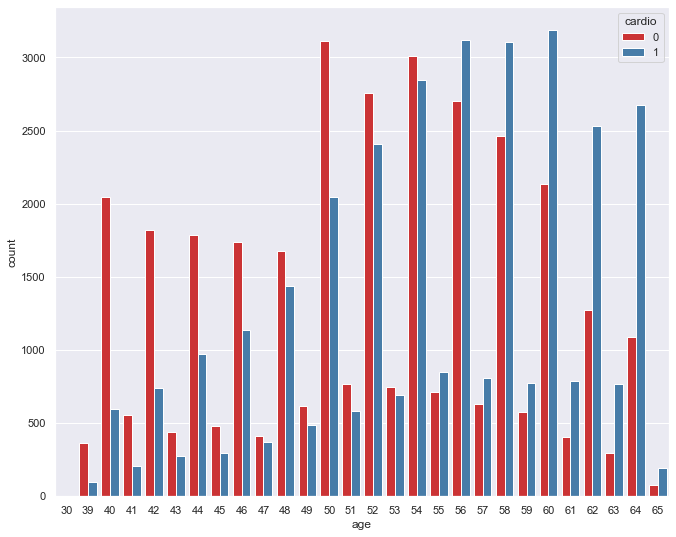

In [41]:
rcParams['figure.figsize'] = 11, 9
sns.countplot(x='age', hue='cardio', data = df, palette="Set1");

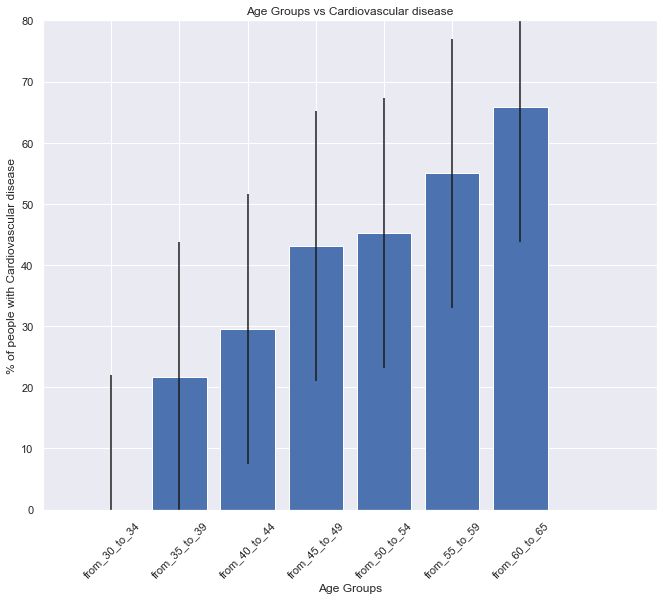

percentages of Age groups with cardio out of the total in each age group: age_groups
from_30_to_34    0.000000
from_35_to_39    0.216450
from_40_to_44    0.295390
from_45_to_49    0.431114
from_50_to_54    0.452167
from_55_to_59    0.549705
from_60_to_65    0.657780
Name: cardio, dtype: float64


In [42]:
age_group = df.groupby(['age_groups'], as_index=False)
age_count = age_group.count()['cardio']
age_sum = age_group.sum()['cardio']
age_percentage = age_sum / age_count * 100


plt.bar(x=range(0,7), height=age_percentage, yerr=age_percentage.std(), align='center', 
        tick_label=["from_30_to_34","from_35_to_39","from_40_to_44","from_45_to_49",
                    "from_50_to_54", "from_55_to_59","from_60_to_65"])
plt.title("Age Groups vs Cardiovascular disease")
plt.ylabel("% of people with Cardiovascular disease")
plt.xlabel("Age Groups")
plt.axis([-1,8,0,80])
plt.xticks(rotation = 45 )
plt.show()

print('percentages of Age groups with cardio out of the total in each age group:', 
      (df.groupby('age_groups')['cardio'].mean()))




From the first graph, it can be observed that people over 55 of age are more exposed to Cardiovascular disease. Whereas the second graph showes the positive corrolation of age groups with Cardiovascular disease rate.

### ----------------------------------------------------------------------------------------------------------

>Does high number of ap_hi and ap_lo affect Cardiovascular disease? For the sake of simplicity we will assume no one has any additional risk factors for Cardiovascular disease?

Hence, when someone's blood pressure rises, both the ap_hi and ap_lo rise together. However there are rare cases where ap_hi rises on its own.

So, to answer this question we are going to use blood pressure (bp_categ) we created earlier and study this one instead. 

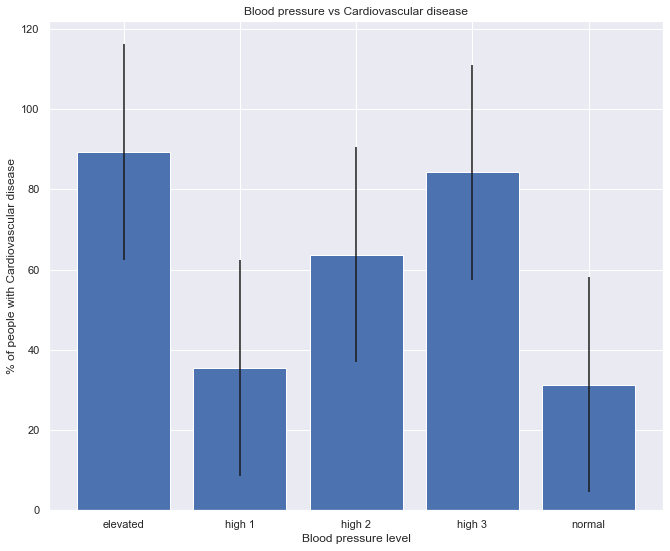

percentages of blood pressure categorys with cardio out of the total in each blood pressur category: bp_categ
Crisis          0.892857
elevated        0.354916
high stage 1    0.637279
high stage 2    0.842510
normal          0.313443
Name: cardio, dtype: float64


In [43]:
bp_group = df.groupby(['bp_categ'], as_index=False)
bp_count = bp_group.count()['cardio']
bp_sum = bp_group.sum()['cardio']
bp_percentage = bp_sum / bp_count * 100

plt.bar(x=range(0,5), height=bp_percentage, yerr=bp_percentage.std(), align='center', 
        tick_label=["elevated","high 1","high 2","high 3","normal"])
plt.title("Blood pressure vs Cardiovascular disease")
plt.ylabel("% of people with Cardiovascular disease")
plt.xlabel("Blood pressure level")
plt.show()

print('percentages of blood pressure categorys with cardio out of the total in each blood pressur category:',
      (df.groupby('bp_categ')['cardio'].mean()))

we can see that there is a positive corrolation between the blood pressure classes and Cardiovascular disease rate. 

### ----------------------------------------------------------------------------------------------------------

>Does obesity affect Cardiovascular disease? 

Hence, we generated bmi_groups earlier and we are going to use it here

(BMI) Body Mass Index is a measure of body fat which relys on the height and weight of an adult. so we understand that . Here we can use the BMI measure to figure out if a person is obese or not and accordingly if the person has a high risk of Cardiovascular disease or not.

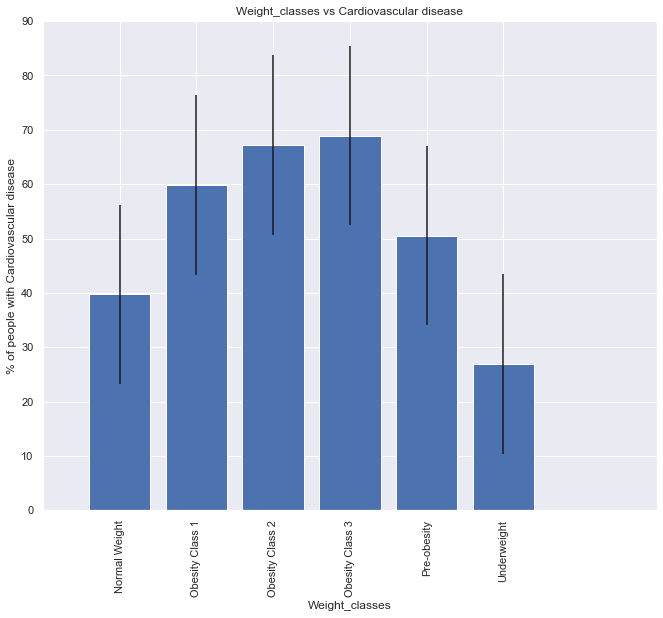

percentages of Weight classes with cardio out of the total in each Weight class: weight_classes
Normal weight                            0.397480
Obesity Class 1 (Moderately obese)       0.598848
Obesity Class 2 (Severely obese)         0.672466
Obesity Class 3 (Very severely obese)    0.689459
Pre-obesity                              0.505434
Underweight                              0.269294
Name: cardio, dtype: float64


In [44]:
bmi_group = df.groupby(['weight_classes'], as_index=False)
bmi_count = bmi_group.count()['cardio']
bmi_sum = bmi_group.sum()['cardio']
bmi_percentage = bmi_sum / bmi_count * 100



plt.bar(x=range(0,6), height=bmi_percentage, yerr=bmi_percentage.std(), align='center', 
        tick_label=["Normal Weight","Obesity Class 1","Obesity Class 2","Obesity Class 3",
                    "Pre-obesity","Underweight"])
plt.title("Weight_classes vs Cardiovascular disease")
plt.ylabel("% of people with Cardiovascular disease")
plt.xlabel("Weight_classes")

plt.axis([-1,7,0,90])
plt.xticks(rotation = 90 )
plt.show()

print('percentages of Weight classes with cardio out of the total in each Weight class:', (df.groupby('weight_classes')['cardio'].mean()))

From the weight classes analysis we can say that, nomal weight BMI and underweight BMI have the lowest effect probabilty on Cardiovascular disease. This is because a person with low BMI would have low body fat composition and most likely low cholesterol as well.

### ----------------------------------------------------------------------------------------------------------

## 5.Model Generation and Selection

In [45]:
###########################################################################
#                                 imports                                 #
###########################################################################
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import xgboost as xgb
#from sklearn.metrics import f1_score, roc_auc_score

### ----------------------------------------------------------------------------------------------------------

Here, we defin X by dropping the "cardio" column in our dataset as this will be our target prediction variable.
We also dropp the four object generated featers as their datatypes are strings. Hence, machine learning algorithems only understands numerical values. 

In [47]:
X = df.drop(['cardio', 'age_groups', 'gender' , 'weight_classes' , 'bp_categ' ], axis=1) 
y = df['cardio']

In [48]:
# we define a function that split the dataframe into training and testing datasets, 
# and return clssification report
def test_model (model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                        random_state=123, stratify=y)
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    
    print (classification_report(y_test, y_pred))
    print (pd.DataFrame(classification_report(y_test, y_pred, output_dict = True)))



### ----------------------------------------------------------------------------------------------------------

>K-Nearest Neighbors Classifier

In [49]:
knn = KNeighborsClassifier (n_neighbors=9)
test_model (knn, X, y)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      6938
           1       0.72      0.67      0.69      6797

    accuracy                           0.71     13735
   macro avg       0.71      0.71      0.70     13735
weighted avg       0.71      0.71      0.71     13735

                     0            1  accuracy     macro avg  weighted avg
precision     0.696628     0.715562  0.705424      0.706095      0.705998
recall        0.738397     0.671767  0.705424      0.705082      0.705424
f1-score      0.716905     0.692973  0.705424      0.704939      0.705062
support    6938.000000  6797.000000  0.705424  13735.000000  13735.000000


### ----------------------------------------------------------------------------------------------------------

>Logistic Regression Model

In [50]:
logreg = LogisticRegression (penalty='l2')
test_model (logreg, X, y)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6938
           1       0.74      0.67      0.70      6797

    accuracy                           0.72     13735
   macro avg       0.72      0.72      0.72     13735
weighted avg       0.72      0.72      0.72     13735

                     0            1  accuracy     macro avg  weighted avg
precision     0.703211     0.744772  0.721587      0.723991      0.723778
recall        0.776593     0.665441  0.721587      0.721017      0.721587
f1-score      0.738082     0.702875  0.721587      0.720479      0.720659
support    6938.000000  6797.000000  0.721587  13735.000000  13735.000000


C:\Users\SAlarfaj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### ----------------------------------------------------------------------------------------------------------

>Decision Tree Model

In [51]:
decisiontree = DecisionTreeClassifier(max_depth=4)
test_model (decisiontree, X, y)

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      6938
           1       0.72      0.72      0.72      6797

    accuracy                           0.72     13735
   macro avg       0.72      0.72      0.72     13735
weighted avg       0.72      0.72      0.72     13735

                     0            1  accuracy     macro avg  weighted avg
precision     0.723842     0.721917  0.722898      0.722880      0.722890
recall        0.729893     0.715757  0.722898      0.722825      0.722898
f1-score      0.726855     0.718824  0.722898      0.722840      0.722881
support    6938.000000  6797.000000  0.722898  13735.000000  13735.000000


### ----------------------------------------------------------------------------------------------------------

>Random Forest Model

In [52]:
randomforest = RandomForestClassifier(n_estimators=1000, max_depth=10, 
                                      min_samples_leaf=15, min_samples_split=4)
test_model (randomforest, X, y)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6938
           1       0.75      0.69      0.72      6797

    accuracy                           0.73     13735
   macro avg       0.73      0.73      0.73     13735
weighted avg       0.73      0.73      0.73     13735

                     0            1  accuracy     macro avg  weighted avg
precision     0.716673     0.752260  0.732727      0.734466      0.734284
recall        0.778755     0.685744  0.732727      0.732249      0.732727
f1-score      0.746425     0.717463  0.732727      0.731944      0.732093
support    6938.000000  6797.000000  0.732727  13735.000000  13735.000000


Based on the findings from the classification report, we have our winner model to be the fitted Random Forest model. This decision come after examining different parameters in each classification model. Although, here we have one of the best scores for this dataset in the literature I have explored, there is a place for improvement, I guess. For the sake of this project, we will end here, however, randomized search on hyper parameters via RandomizedSearchCV could be beneficial for better choice of the models' parameters. In Addition, implementation of Neural Network is highly suggested as one of the few next steps to further examined for this dataset.

### ----------------------------------------------------------------------------------------------------------